# CDS 230 - Modeling and Simulation 1 - Fall 2019
# Example problems

**Lecturer:** Dr. Hamdi Kavak

**Email:** hkavak@gmu.edu

**Lecture:** 11/25/2019

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Radioactive decay problem

In [3]:
# import ODE solver
from scipy.integrate import odeint

In [6]:
# Represent the time
t = np.linspace(0,30,1000)

In [7]:
# set the initial condition and constants
N0 = 100 # gram
lamda = 0.0866
# or you can use N0,lamda=(100,0.0866)

In [8]:
# create the function
def dn_dt(N,t,lamda):
    return -lamda*N

In [9]:
# call the solver
res = odeint(dn_dt, N0, t, args=(lamda,))

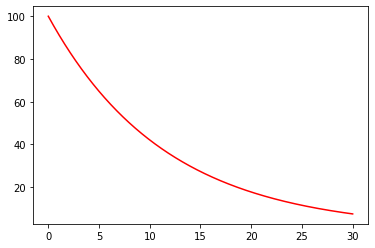

In [14]:
# plot the result
plt.plot(t,res[:,0], color="red", label="Numerical solution")
plt.show()

In [17]:
# compare with the closed form solution
closed_form_solution = N0*np.exp(-lamda*t)

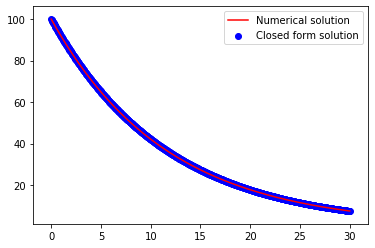

In [20]:
plt.plot(t,res[:,0], color="red", label="Numerical solution")
plt.scatter(t,closed_form_solution, color="blue", label="Closed form solution")
plt.legend()
plt.show()

## Random numbers - Slide #4

In [21]:
# roll a fair die - version 1
die = np.random.randint(1,7)
print(die)

3


In [22]:
# roll a fair die - version 2
die = np.random.choice([1,2,3,4,5,6])
print(die)

1


In [24]:
# roll a fair die - version 3
die = np.random.choice(np.arange(1,7))
print(die)

6


In [26]:
# roll three fair dice
dice =  np.random.randint(1,7,size=3)
print(dice)

[4 5 2]


In [27]:
# unfair die
# 1=10%, 2=10%, 3=20%, 4=10%, 5=10%, 6=40%
die = np.random.choice([1,2,3,4,5,6],p=[0.1, 0.1, 0.2, 0.1, 0.1, 0.4])
print(die)

6


In [28]:
# if you do not provide probabilities sum to 1
die = np.random.choice([1,2,3,4,5,6],p=[0.1, 0.1, 0.2, 0.1, 0.1, 0.3])

ValueError: probabilities do not sum to 1

In [30]:
# Roll three fixed (unfair) dice
# 1=10%, 2=10%, 3=50%, 4=10%, 5=20%, 6=0%
die = np.random.choice([1,2,3,4,5,6],p=[0.1,0.1,0.5,0.1,0.2,0.0],size=3)
print(die)

[3 1 1]


In [31]:
# Roll two fair and two fixed (unfair) dice.
# 1=20%, 2=20%, 3=17%, 4=15%, 5=14%, 6=14%
fair_dice = np.random.choice(np.arange(1,7),size=2)
unfair_dice = np.random.choice([1,2,3,4,5,6],p=[0.2,0.2,0.17,0.15,0.14,0.14],size=2)

In [32]:
np.concatenate([fair_dice,unfair_dice])

array([4, 1, 2, 3])

In [33]:
unfair_dice_values_100m = np.random.choice([1,2,3,4,5,6],p=[0.2,0.2,0.17,0.15,0.14,0.14],size=100000000)

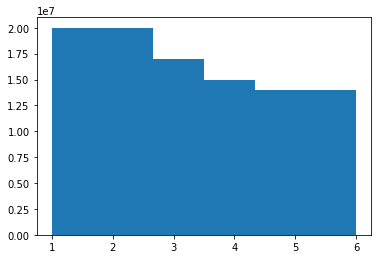

In [34]:
# spotting an unfair die
plt.hist(unfair_dice_values_100m,bins=6)
plt.show()

## Fruit example

In [36]:
fruits = ["Grapefruit","Pineapple","Avocado","Blueberries","Apples","Pomegranate","Mango","Strawberries","Cranberries","Lemons","Watermelon","Olives","Blackberries","Oranges","Bananas"]
print(fruits)

['Grapefruit', 'Pineapple', 'Avocado', 'Blueberries', 'Apples', 'Pomegranate', 'Mango', 'Strawberries', 'Cranberries', 'Lemons', 'Watermelon', 'Olives', 'Blackberries', 'Oranges', 'Bananas']


In [41]:
# version 1
def fruit_suggestion():
    fruits = ["Grapefruit","Pineapple","Avocado","Blueberries","Apples","Pomegranate","Mango","Strawberries","Cranberries","Lemons","Watermelon","Olives","Blackberries","Oranges","Bananas"]
    selected_fruits = np.random.choice(fruits,size=2,replace=False)
    return selected_fruits

In [42]:
fruit_suggestion()

array(['Apples', 'Lemons'], dtype='<U12')

In [43]:
# version 2
def fruit_suggestion_v2():
    fruits = ["Grapefruit","Pineapple","Avocado","Blueberries","Apples","Pomegranate","Mango","Strawberries","Cranberries","Lemons","Watermelon","Olives","Blackberries","Oranges","Bananas"]
    # shuffle does not return but modifies the orders of the original list
    np.random.shuffle(fruits)
    return fruits[:2]

In [44]:
fruit_suggestion_v2()

['Pineapple', 'Bananas']

In [45]:
# version 3
def fruit_suggestion_v3():
    fruits = ["Grapefruit","Pineapple","Avocado","Blueberries","Apples","Pomegranate","Mango","Strawberries","Cranberries","Lemons","Watermelon","Olives","Blackberries","Oranges","Bananas"]
    # permutation returns a shuffled list but it does not modify the original list
    shuffled_fruit_list = np.random.permutation(fruits)
    return shuffled_fruit_list[:2]

In [46]:
fruit_suggestion_v3()

array(['Cranberries', 'Grapefruit'], dtype='<U12')

## Guess the number game

In [50]:
number_to_predict = np.random.randint(1,101)
print(number_to_predict)

5


In [52]:
# Shows the message “Enter a number between 1 and 100”.
value = input("Enter a number between 1 and 100")
user_prediction = int(value)
print(user_prediction)

Enter a number between 1 and 100 99


99


In [ ]:
# If the number is correct, tell the user “Well done!”; 
# If the number is not correct, tell the user whether the user’s number was higher or lower than the memorized number. 

if user_prediction == number_to_predict:
    print("Well done!")
elif user_prediction > number_to_predict:
    print("Select a lower number")
else:
    print("Select a higher value")

In [53]:
# combining the statements here
number_to_predict = np.random.randint(1,101)
user_prediction = -1
counter = 0

while number_to_predict != user_prediction:
    value = input("Enter a number between 1 and 100")
    user_prediction = int(value)
    counter = counter + 1
    if user_prediction == number_to_predict:
        print("Well done!")
    elif user_prediction > number_to_predict:
        print("Select a lower number")
    else:
        print("Select a higher value")

print("Number of trials: ", counter)

Enter a number between 1 and 100 50


Select a higher value


Enter a number between 1 and 100 75


Select a lower number


Enter a number between 1 and 100 60


Select a higher value


Enter a number between 1 and 100 65


Select a higher value


Enter a number between 1 and 100 70


Select a lower number


Enter a number between 1 and 100 67


Well done!
Number of trials:  6
